In [141]:
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.plotter import BSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [142]:
# input the mp id and the API key
MP_id = "mp-867193"
API = "aEF0VdAXhHPNJOkG"

# defining the material object
mpr = MPRester(API)

# Téléchargement de la structure de bandes électroniques du matériau 

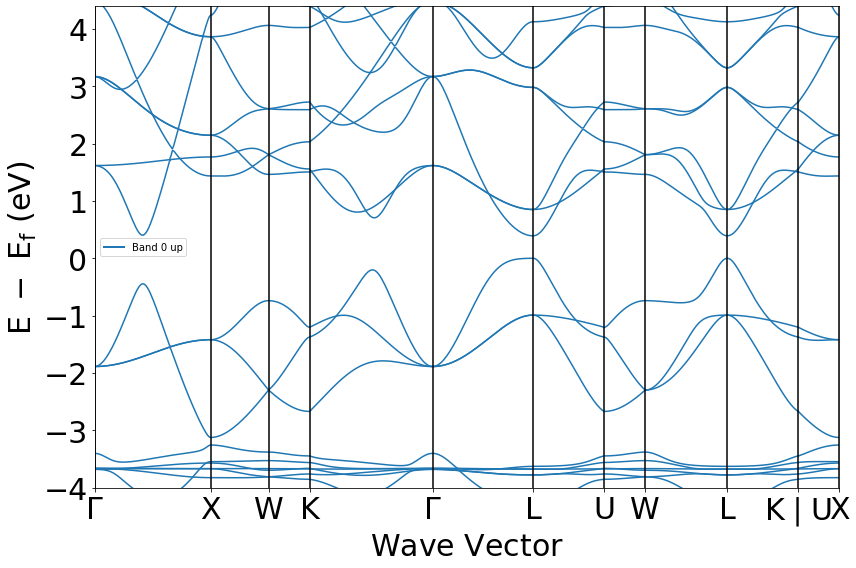

In [143]:
structure_bande = mpr.get_bandstructure_by_material_id(MP_id)
BSplot = BSPlotter(structure_bande)
BSplot.show()

# Analyse de cette structure de bande

## Détermination de la bande interdite

In [144]:
bande_interdite = structure_bande.get_band_gap()
print("Caractéristique de la bande interdite :")
print("- la bande interdite est-elle directe? ", bande_interdite["direct"])
print("- énergie de la bande interdite :", bande_interdite["energy"], "eV")


Caractéristique de la bande interdite :
- la bande interdite est-elle directe?  True
- énergie de la bande interdite : 0.39139999999999997 eV


### Ce matériau est donc un semi-conducteur au vu de la valeur de l'énergie de sa bande interdite.

# Direction dans laquelle la dernière bande de valence présente le plus et le moins de dispersion

In [148]:
data = BSplot.bs_plot_data()
energy = data.get('energy')
distance = dt.get('ticks').get('distance')

tab_dist = np.array([distance[0], distance[1], distance[3], distance[5], distance[7], distance[9], distance[11],
                     distance[13], distance[15],distance[18]])

# Distance entre chaque branche :
d = tab_dist[1:] - tab_dist[0:-1]


In [156]:
# Pente entre chaque branche :
pente_valence = np.zeros(np.shape(d))
for i in range(np.size(d)):
    pente_valence[i] = ((energy['1'][i][17][-1]) - (energy['1'][i][17][0]))/d[i]

    
maxValence = np.max(abs(pente_valence)) #indice4
minValence = np.min(abs(pente_valence)) #indice0



In [150]:
print("- Direction qui présente le plus de dispertion : K - Γ ","(maxValence=",maxValence,")")
print("- Direction qui présente le moins de dispertion : Γ - X ","(minValence=",minValence,")")


- Direction qui présente le plus de dispertion : K - Γ  (maxValence= 2.7819492709604834 )
- Direction qui présente le moins de dispertion : Γ - X  (minValence= 0.5969795109677785 )


# Direction dans laquelle la première bande de conduction présente le plus et le moins de dispersion

In [151]:
#Pente entre chaque branche :
pente_conduction = np.zeros(np.shape(d))
for i in range(np.size(d)):
    pente_conduction[i] = ((energy['1'][i][18][-1]) - (energy['1'][i][18][0]))/d[i]
    
maxConduction = np.max(abs(pente_conduction))#indice5
minConduction = np.min(abs(pente_conduction))#indice1



In [152]:
print("- Direction qui présente le plus de dispertion : Γ - L","(maxConduction=",maxConduction,")")
print("- Direction qui présente le moins de dispertion : Γ - X ","(minConduction=",minConduction,")")

- Direction qui présente le plus de dispertion : Γ - L (maxConduction= 2.321033980117346 )
- Direction qui présente le moins de dispertion : Γ - X  (minConduction= 0.07072853915229949 )


##  Figure indiquant la dispersion par des flèches

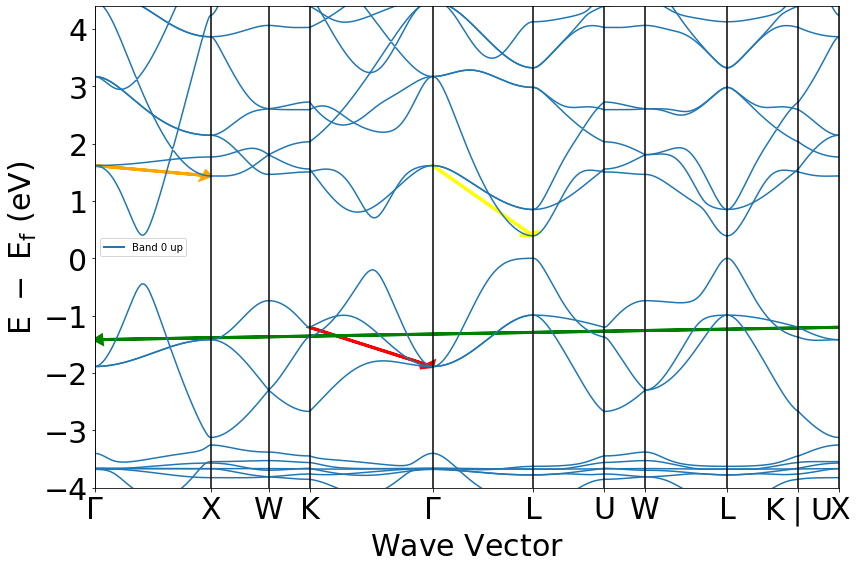

In [155]:
pl = BSplot.get_plot()
#maxV
plt.arrow(tab_dist[3], (energy['1'][3][17])[0],tab_dist[4] - tab_dist[3], (energy['1'][3][17])[-1] - (energy['1'][3][17])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='r', length_includes_head=True)
#minV
plt.arrow(tab_dist[-1], (energy['1'][-1][17])[0],tab_dist[0] - tab_dist[-1], (energy['1'][-1][17])[-1] - (energy['1'][-1][17])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='g', length_includes_head=True)
#maxC
plt.arrow(tab_dist[4], (energy['1'][4][18])[0],tab_dist[5] - tab_dist[4], (energy['1'][4][18])[-1] - (energy['1'][4][18])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='yellow', length_includes_head=True)
#minC
plt.arrow(tab_dist[0], (energy['1'][0][18])[0],tab_dist[1] - tab_dist[0], (energy['1'][0][18])[-1] - (energy['1'][0][18])[0],
          head_width=0.15, head_length=0.05, linewidth=3, color='orange', length_includes_head=True)

plt.show()

### Je vois bien que la flèche verte est étrange mais je ne sais pas pourquoi